In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import scipy
import os
from scipy.stats import linregress
from datetime import timedelta

import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 300

## 1. Load in and organize data

In [2]:
fielddata_path = 'C:/Users/jeanallen/Desktop/SHIFT_CWC/data/field_data/LWC_LFM_WP_dates20230525.csv'

cwc_dir_850_1300 = 'C:/Users/jeanallen/Desktop/SHIFT_CWC/data/SHIFT_data/cwc_850_1100'
cwc_dir_850_1100 = 'C:/Users/jeanallen/Desktop/SHIFT_CWC/data/SHIFT_data/cwc_850_1300'
cwc_dir_1100_1300 = 'C:/Users/jeanallen/Desktop/SHIFT_CWC/data/SHIFT_data/cwc_1100_1300'

In [3]:
## reading in and organizing field data
fielddata = pd.read_csv(fielddata_path)
lwp = fielddata[['tree','time','species','date_wp','mpa_mean']] \
        .dropna().drop_duplicates().reset_index(drop=True)
lwp['datetime_wp'] = lwp.apply(lambda x: datetime.strptime(str(x['date_wp']),'%Y-%m-%d'), axis=1)

lwa = fielddata[['tree','time','species','date_wp','lwa_g_cm2']] \
        .dropna().drop_duplicates().reset_index(drop=True)
lwa['datetime_wp'] = lwa.apply(lambda x: datetime.strptime(str(x['date_wp']),'%Y-%m-%d'), axis=1)

lwc = fielddata[['tree','time','species','date_wp','lwc_mean']] \
        .dropna().drop_duplicates().reset_index(drop=True)
lwc['datetime_wp'] = lwc.apply(lambda x: datetime.strptime(str(x['date_wp']),'%Y-%m-%d'), axis=1)

In [9]:
## reading in and organizing CWC data

# date_list = ['20220224', '20220228',  '20220308', '20220316', '20220322', '20220405', '20220420', '20220429', '20220503', '20220511', '20220517', '20220529', '20220914']
date_list = ['20220429', '20220503', '20220511', '20220517', '20220529', '20220914']
datetime_list = [datetime.strptime(date, '%Y%m%d') for date in date_list]

# handling for non-convergence in the invert_liquid_water function
def kill_nans(df):
    mask = (df['CWC'] > 0.499962 - 0.0001) & (df['CWC'] < 0.499962 + 0.0001)
    df.loc[mask, 'CWC'] = np.nan
    return df

## first the full baloney of 850-1300nm
cwc_file_paths_850_1300 = [os.path.join(cwc_dir_850_1300, date + '_cwc.csv') for date in date_list]
# read in one file just to get the tree numbers
cwc_850_1300 = pd.read_csv(cwc_file_paths_850_1300[0]).set_index('Tree Number').drop(columns=['MAE', 'Intercept', 'Slope']).rename(columns={'CWC': 'CWC_' + date_list[0]})
for date, file_path in zip(date_list[1:], cwc_file_paths_850_1300[1:]):
    other_df = pd.read_csv(file_path).set_index('Tree Number')
    cwc_850_1300 = cwc_850_1300.join(other_df['CWC']).rename(columns={'CWC': 'CWC_' + date})
# now make a list of dataframes containing all the good stuff
cwc_df_list_850_1300 = []
for date, file_path in zip(date_list, cwc_file_paths_850_1300):
    cwc_df = pd.read_csv(file_path)
    cwc_df['datetime'] = datetime.strptime(date, '%Y%m%d')
    cwc_df = kill_nans(cwc_df)
    cwc_df_list_850_1300.append(cwc_df)


## now the 850-1100nm...
cwc_file_paths_850_1100 = [os.path.join(cwc_dir_850_1100, date + '_cwc.csv') for date in date_list]
# read in one file just to get the tree numbers
cwc_850_1100 = pd.read_csv(cwc_file_paths_850_1100[0]).set_index('Tree Number').drop(columns=['MAE', 'Intercept', 'Slope']).rename(columns={'CWC': 'CWC_' + date_list[0]})
for date, file_path in zip(date_list[1:], cwc_file_paths_850_1100[1:]):
    other_df = pd.read_csv(file_path).set_index('Tree Number')
    cwc_850_1100 = cwc_850_1100.join(other_df['CWC']).rename(columns={'CWC': 'CWC_' + date})
# now make a list of dataframes containing all the good stuff
cwc_df_list_850_1100 = []
for date, file_path in zip(date_list, cwc_file_paths_850_1100):
    cwc_df = pd.read_csv(file_path)
    cwc_df['datetime'] = datetime.strptime(date, '%Y%m%d')
    cwc_df = kill_nans(cwc_df)
    cwc_df_list_850_1100.append(cwc_df)


## finally the 1100-1300nm region
cwc_file_paths_1100_1300 = [os.path.join(cwc_dir_1100_1300, date + '_cwc.csv') for date in date_list]
# read in one file just to get the tree numbers
cwc_1100_1300 = pd.read_csv(cwc_file_paths_1100_1300[0]).set_index('Tree Number').drop(columns=['MAE', 'Intercept', 'Slope']).rename(columns={'CWC': 'CWC_' + date_list[0]})
for date, file_path in zip(date_list[1:], cwc_file_paths_1100_1300[1:]):
    other_df = pd.read_csv(file_path).set_index('Tree Number')
    cwc_1100_1300 = cwc_1100_1300.join(other_df['CWC']).rename(columns={'CWC': 'CWC_' + date})
# now make a list of dataframes containing all the good stuff
cwc_df_list_1100_1300 = []
for date, file_path in zip(date_list, cwc_file_paths_1100_1300):
    cwc_df = pd.read_csv(file_path)
    cwc_df['datetime'] = datetime.strptime(date, '%Y%m%d')
    cwc_df = kill_nans(cwc_df)
    cwc_df_list_1100_1300.append(cwc_df)

In [10]:
# Defining color cycle to correspond with dates, extended a lil to account for more dates
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_list.append('#000080')
color_list.append('#420303')
color_list.append('#018788')

## 2. Joining CWC and Field Data

In [11]:
## function to hunt down the MD LWP for a given tree and date
def get_midday_lwp(thisTree, imgdate):
    try:
        ourTree = int(thisTree)
    except:
        return np.NaN # specific handling for uncertainty in tree number (whoops)
    lowerDateBound = imgdate + timedelta(days=-3)
    upperDateBound = imgdate + timedelta(days=3)
    filtered = lwp[(lwp['tree']==int(thisTree)) & (lwp['time']=='md') & (lwp['datetime_wp']<=upperDateBound) & (lwp['datetime_wp']>=lowerDateBound)]
    return filtered['mpa_mean'].mean()

## function to hunt down the PD LWP for a given tree and date
def get_predawn_lwp(thisTree, imgdate):
    try:
        ourTree = int(thisTree)
    except:
        return np.NaN
    lowerDateBound = imgdate + timedelta(days=-8)
    upperDateBound = imgdate + timedelta(days=8)
    filtered = lwp[(lwp['tree']==int(thisTree)) & (lwp['time']=='pd') & (lwp['datetime_wp']<=upperDateBound) & (lwp['datetime_wp']>=lowerDateBound)]
    return filtered['mpa_mean'].mean()

## function to hunt down the MD LWC for a given tree and date
def get_midday_lwc(thisTree, imgdate):
    try:
        ourTree = int(thisTree)
    except:
        return np.NaN
    lowerDateBound = imgdate + timedelta(days=-3)
    upperDateBound = imgdate + timedelta(days=3)
    filtered = lwc[(lwc['tree']==int(thisTree)) & (lwc['time']=='md') & (lwc['datetime_wp']<=upperDateBound) & (lwc['datetime_wp']>=lowerDateBound)]
    return filtered['lwc_mean'].mean()

In [12]:
## append the LWP and LWC data to the CWC dataframes to make things easier later
for cwc_df in cwc_df_list_850_1300:
    cwc_df['midday_lwp'] = cwc_df.apply(lambda x: get_midday_lwp(x['Tree Number'], x['datetime']), axis=1)
    cwc_df['predawn_lwp'] = cwc_df.apply(lambda x: get_predawn_lwp(x['Tree Number'], x['datetime']), axis=1)
    cwc_df['midday_lwc'] = cwc_df.apply(lambda x: get_midday_lwc(x['Tree Number'], x['datetime']), axis=1)

for cwc_df in cwc_df_list_850_1100:
    cwc_df['midday_lwp'] = cwc_df.apply(lambda x: get_midday_lwp(x['Tree Number'], x['datetime']), axis=1)
    cwc_df['predawn_lwp'] = cwc_df.apply(lambda x: get_predawn_lwp(x['Tree Number'], x['datetime']), axis=1)
    cwc_df['midday_lwc'] = cwc_df.apply(lambda x: get_midday_lwc(x['Tree Number'], x['datetime']), axis=1)

for cwc_df in cwc_df_list_1100_1300:
    cwc_df['midday_lwp'] = cwc_df.apply(lambda x: get_midday_lwp(x['Tree Number'], x['datetime']), axis=1)
    cwc_df['predawn_lwp'] = cwc_df.apply(lambda x: get_predawn_lwp(x['Tree Number'], x['datetime']), axis=1)
    cwc_df['midday_lwc'] = cwc_df.apply(lambda x: get_midday_lwc(x['Tree Number'], x['datetime']), axis=1)

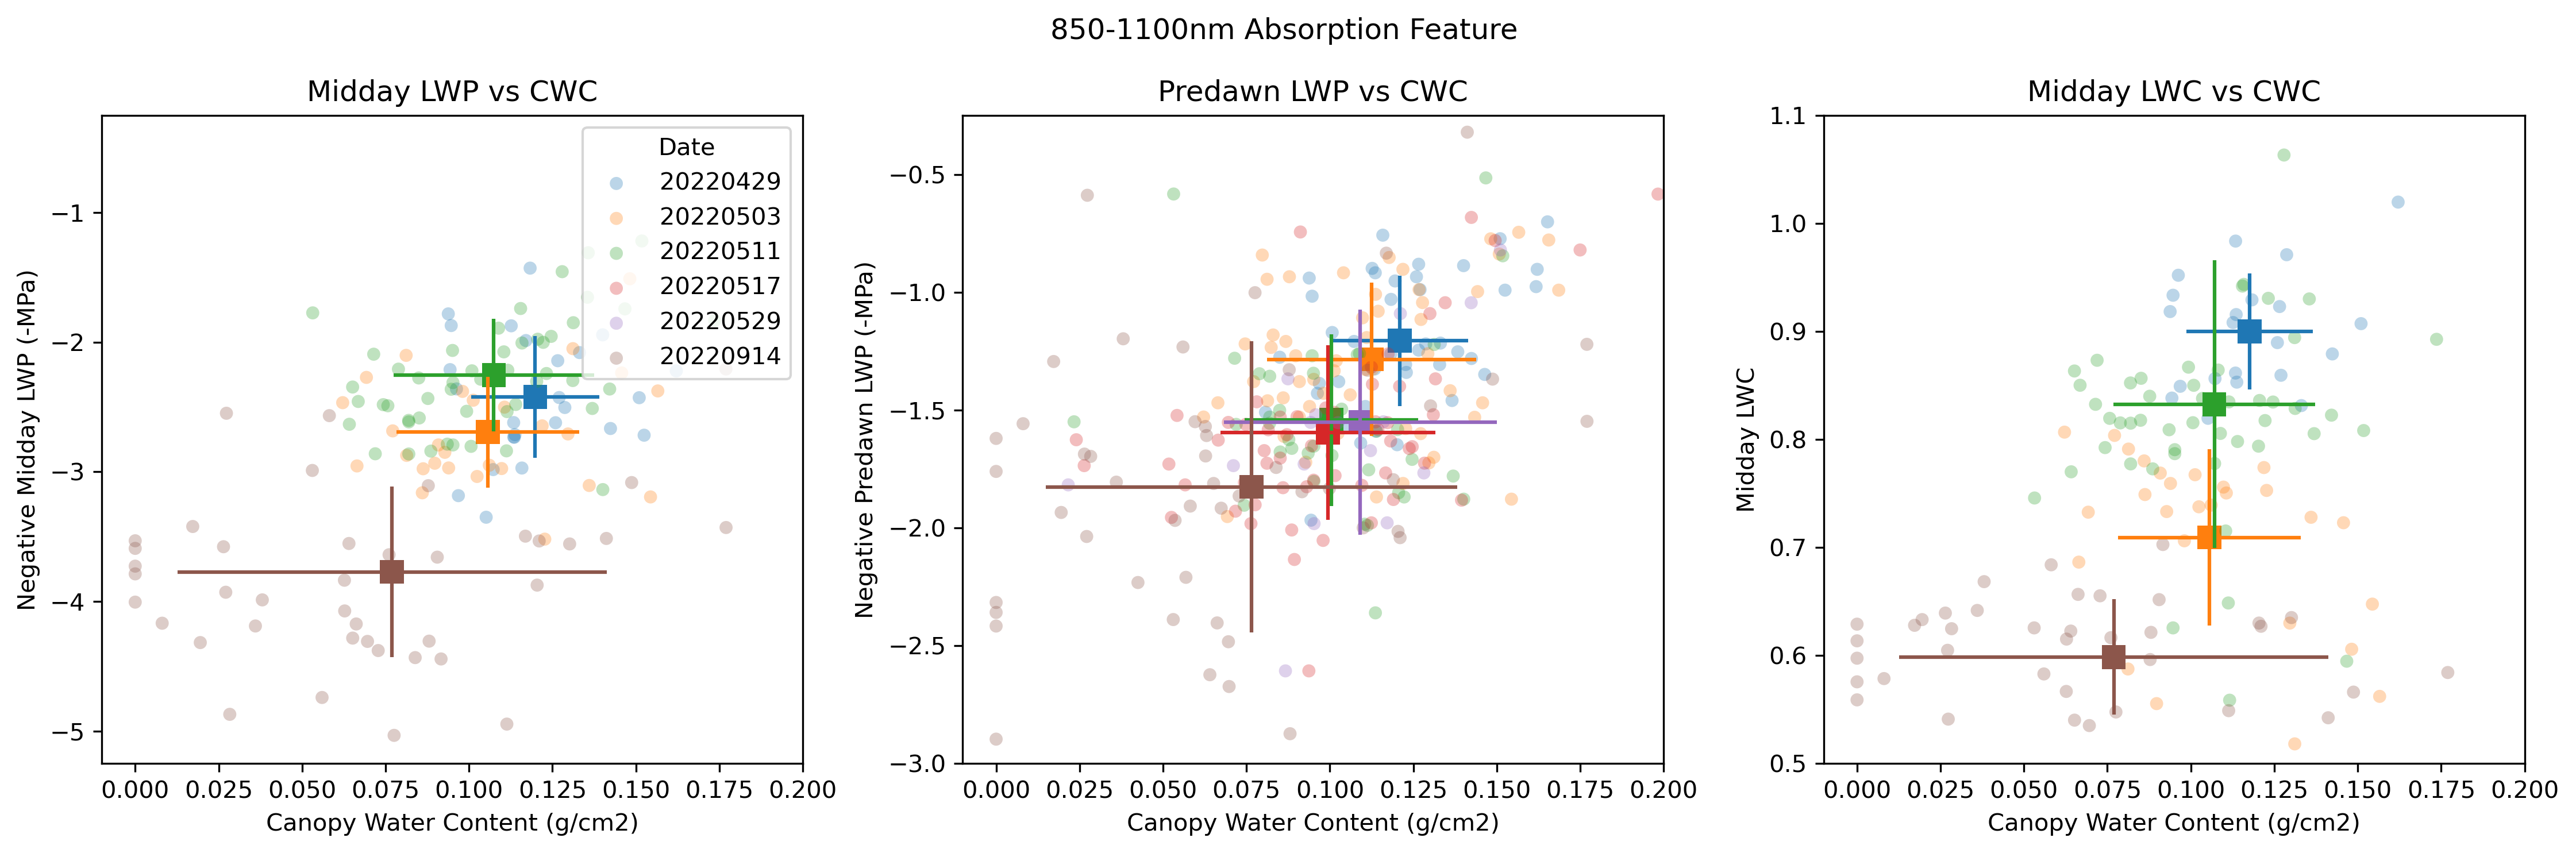

In [36]:
# first absorption feature (850-1100)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

for date, cwc_df, color in zip(date_list, cwc_df_list_850_1100, color_list):
    cwc_df_dropna_mdlwp = cwc_df.dropna(subset=['midday_lwp', 'CWC'])
    avg_cwc_mdlwp = cwc_df_dropna_mdlwp['CWC'].mean()
    avg_midday_lwp = cwc_df_dropna_mdlwp['midday_lwp'].mean()
    std_cwc_mdlwp = cwc_df_dropna_mdlwp['CWC'].std()
    std_midday_lwp = cwc_df_dropna_mdlwp['midday_lwp'].std()

    cwc_df_dropna_pdlwp = cwc_df.dropna(subset=['predawn_lwp', 'CWC'])
    avg_cwc_pdlwp = cwc_df_dropna_pdlwp['CWC'].mean()
    avg_predawn_lwp = cwc_df_dropna_pdlwp['predawn_lwp'].mean()
    std_cwc_pdlwp = cwc_df_dropna_pdlwp['CWC'].std()
    std_predawn_lwp = cwc_df_dropna_pdlwp['predawn_lwp'].std()

    cwc_df_dropna_lwc = cwc_df.dropna(subset=['midday_lwc', 'CWC'])
    avg_cwc_lwc = cwc_df_dropna_lwc['CWC'].mean()
    avg_midday_lwc = cwc_df_dropna_lwc['midday_lwc'].mean()
    std_cwc_lwc = cwc_df_dropna_lwc['CWC'].std()
    std_midday_lwc = cwc_df_dropna_lwc['midday_lwc'].std()

    ax1.scatter(cwc_df['CWC'], -1*cwc_df['midday_lwp'], c=color, edgecolors='none', s=30, alpha=0.3, label=date)
    ax1.scatter(avg_cwc_mdlwp, -1*avg_midday_lwp, c=color, edgecolors='none', s=100, alpha=1, marker='s')
    ax1.errorbar(avg_cwc_mdlwp, -1*avg_midday_lwp, yerr=std_midday_lwp, fmt='none', ecolor=color)
    ax1.errorbar(avg_cwc_mdlwp, -1*avg_midday_lwp, xerr=std_cwc_mdlwp, fmt='none', ecolor=color)

    ax2.scatter(cwc_df['CWC'], -1*cwc_df['predawn_lwp'], c=color, edgecolors='none', s=30, alpha=0.3, label=date)
    ax2.scatter(avg_cwc_pdlwp, -1*avg_predawn_lwp, c=color, edgecolors='none', s=100, alpha=1, marker='s')
    ax2.errorbar(avg_cwc_pdlwp, -1*avg_predawn_lwp, yerr=std_predawn_lwp, fmt='none', ecolor=color)
    ax2.errorbar(avg_cwc_pdlwp, -1*avg_predawn_lwp, xerr=std_cwc_pdlwp, fmt='none', ecolor=color)

    ax3.scatter(cwc_df['CWC'], cwc_df['midday_lwc'], c=color, edgecolors='none', s=30, alpha=0.3, label=date)
    ax3.scatter(avg_cwc_lwc, avg_midday_lwc, c=color, edgecolors='none', s=100, alpha=1, marker='s')
    ax3.errorbar(avg_cwc_lwc, avg_midday_lwc, yerr=std_midday_lwc, fmt='none', ecolor=color)
    ax3.errorbar(avg_cwc_lwc, avg_midday_lwc, xerr=std_cwc_lwc, fmt='none', ecolor=color)

fig.suptitle('850-1100nm Absorption Feature')

ax1.set_ylabel('Negative Midday LWP (-MPa)')
ax1.set_xlabel('Canopy Water Content (g/cm2)')
ax1.set_title('Midday LWP vs CWC')
ax1.set_xlim(-0.01, 0.2)
ax1.set_ylim(-5.25, -0.25)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Date', loc='upper right')


ax2.set_ylabel('Negative Predawn LWP (-MPa)')
ax2.set_xlabel('Canopy Water Content (g/cm2)')
ax2.set_title('Predawn LWP vs CWC')
ax2.set_xlim(-0.01, 0.2)
ax2.set_ylim(-3, -0.25)

ax3.set_ylabel('Midday LWC')
ax3.set_xlabel('Canopy Water Content (g/cm2)')
ax3.set_title('Midday LWC vs CWC')
ax3.set_xlim(-0.01, 0.2)
ax3.set_ylim(0.5, 1.1)

plt.tight_layout()
plt.show()

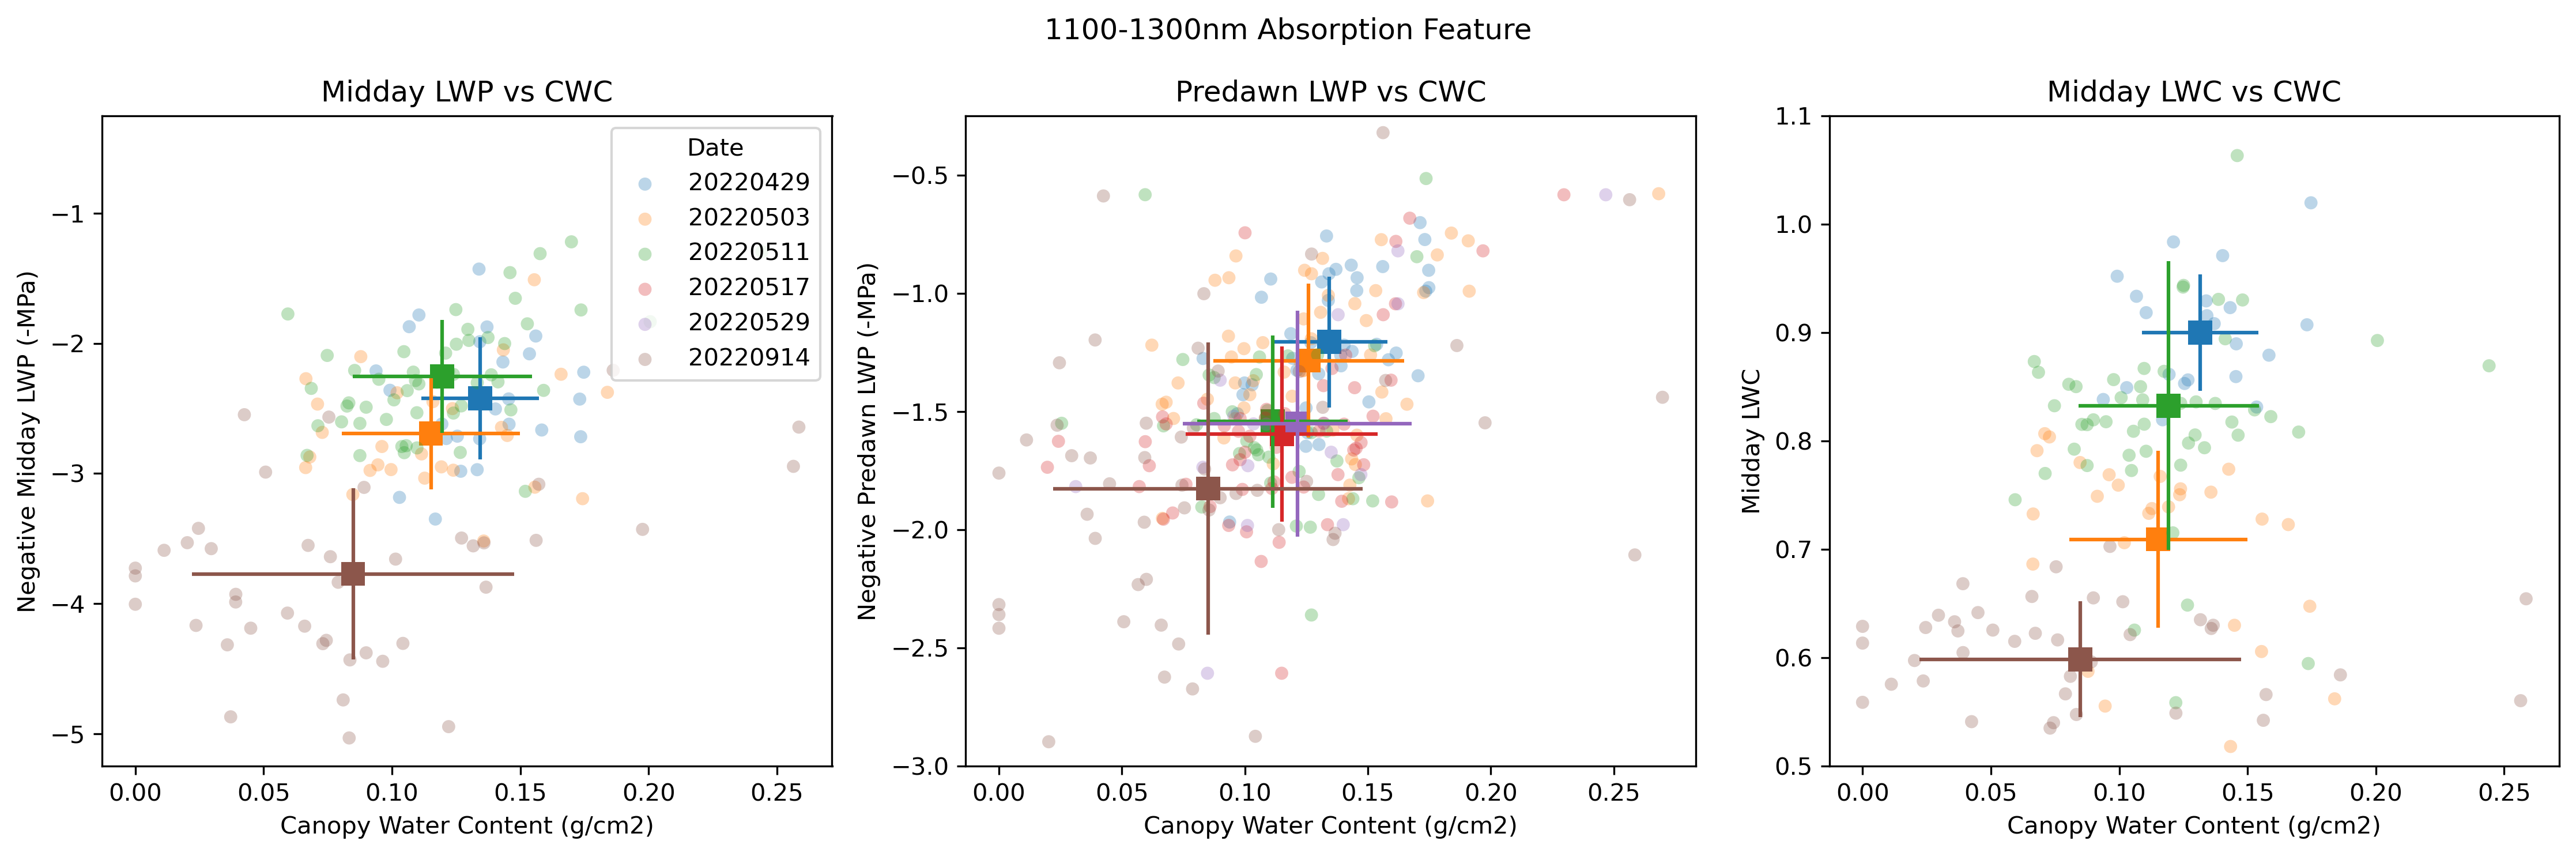

In [35]:
# second absorption feature (1100-1300)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

for date, cwc_df, color in zip(date_list, cwc_df_list_1100_1300, color_list):
    cwc_df_dropna_mdlwp = cwc_df.dropna(subset=['midday_lwp', 'CWC'])
    avg_cwc_mdlwp = cwc_df_dropna_mdlwp['CWC'].mean()
    avg_midday_lwp = cwc_df_dropna_mdlwp['midday_lwp'].mean()
    std_cwc_mdlwp = cwc_df_dropna_mdlwp['CWC'].std()
    std_midday_lwp = cwc_df_dropna_mdlwp['midday_lwp'].std()

    cwc_df_dropna_pdlwp = cwc_df.dropna(subset=['predawn_lwp', 'CWC'])
    avg_cwc_pdlwp = cwc_df_dropna_pdlwp['CWC'].mean()
    avg_predawn_lwp = cwc_df_dropna_pdlwp['predawn_lwp'].mean()
    std_cwc_pdlwp = cwc_df_dropna_pdlwp['CWC'].std()
    std_predawn_lwp = cwc_df_dropna_pdlwp['predawn_lwp'].std()

    cwc_df_dropna_lwc = cwc_df.dropna(subset=['midday_lwc', 'CWC'])
    avg_cwc_lwc = cwc_df_dropna_lwc['CWC'].mean()
    avg_midday_lwc = cwc_df_dropna_lwc['midday_lwc'].mean()
    std_cwc_lwc = cwc_df_dropna_lwc['CWC'].std()
    std_midday_lwc = cwc_df_dropna_lwc['midday_lwc'].std()

    ax1.scatter(cwc_df['CWC'], -1*cwc_df['midday_lwp'], c=color, edgecolors='none', s=30, alpha=0.3, label=date)
    ax1.scatter(avg_cwc_mdlwp, -1*avg_midday_lwp, c=color, edgecolors='none', s=100, alpha=1, marker='s')
    ax1.errorbar(avg_cwc_mdlwp, -1*avg_midday_lwp, yerr=std_midday_lwp, fmt='none', ecolor=color)
    ax1.errorbar(avg_cwc_mdlwp, -1*avg_midday_lwp, xerr=std_cwc_mdlwp, fmt='none', ecolor=color)

    ax2.scatter(cwc_df['CWC'], -1*cwc_df['predawn_lwp'], c=color, edgecolors='none', s=30, alpha=0.3, label=date)
    ax2.scatter(avg_cwc_pdlwp, -1*avg_predawn_lwp, c=color, edgecolors='none', s=100, alpha=1, marker='s')
    ax2.errorbar(avg_cwc_pdlwp, -1*avg_predawn_lwp, yerr=std_predawn_lwp, fmt='none', ecolor=color)
    ax2.errorbar(avg_cwc_pdlwp, -1*avg_predawn_lwp, xerr=std_cwc_pdlwp, fmt='none', ecolor=color)

    ax3.scatter(cwc_df['CWC'], cwc_df['midday_lwc'], c=color, edgecolors='none', s=30, alpha=0.3, label=date)
    ax3.scatter(avg_cwc_lwc, avg_midday_lwc, c=color, edgecolors='none', s=100, alpha=1, marker='s')
    ax3.errorbar(avg_cwc_lwc, avg_midday_lwc, yerr=std_midday_lwc, fmt='none', ecolor=color)
    ax3.errorbar(avg_cwc_lwc, avg_midday_lwc, xerr=std_cwc_lwc, fmt='none', ecolor=color)

fig.suptitle('1100-1300nm Absorption Feature')

ax1.set_ylabel('Negative Midday LWP (-MPa)')
ax1.set_xlabel('Canopy Water Content (g/cm2)')
ax1.set_title('Midday LWP vs CWC')
# ax1.set_xlim(-0.01, 0.2)
ax1.set_ylim(-5.25, -0.25)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Date', loc='upper right')

ax2.set_ylabel('Negative Predawn LWP (-MPa)')
ax2.set_xlabel('Canopy Water Content (g/cm2)')
ax2.set_title('Predawn LWP vs CWC')
# ax2.set_xlim(-0.01, 0.2)
ax2.set_ylim(-3, -0.25)

ax3.set_ylabel('Midday LWC')
ax3.set_xlabel('Canopy Water Content (g/cm2)')
ax3.set_title('Midday LWC vs CWC')
# ax3.set_xlim(-0.01, 0.2)
ax3.set_ylim(0.5, 1.1)

plt.tight_layout()
plt.show()

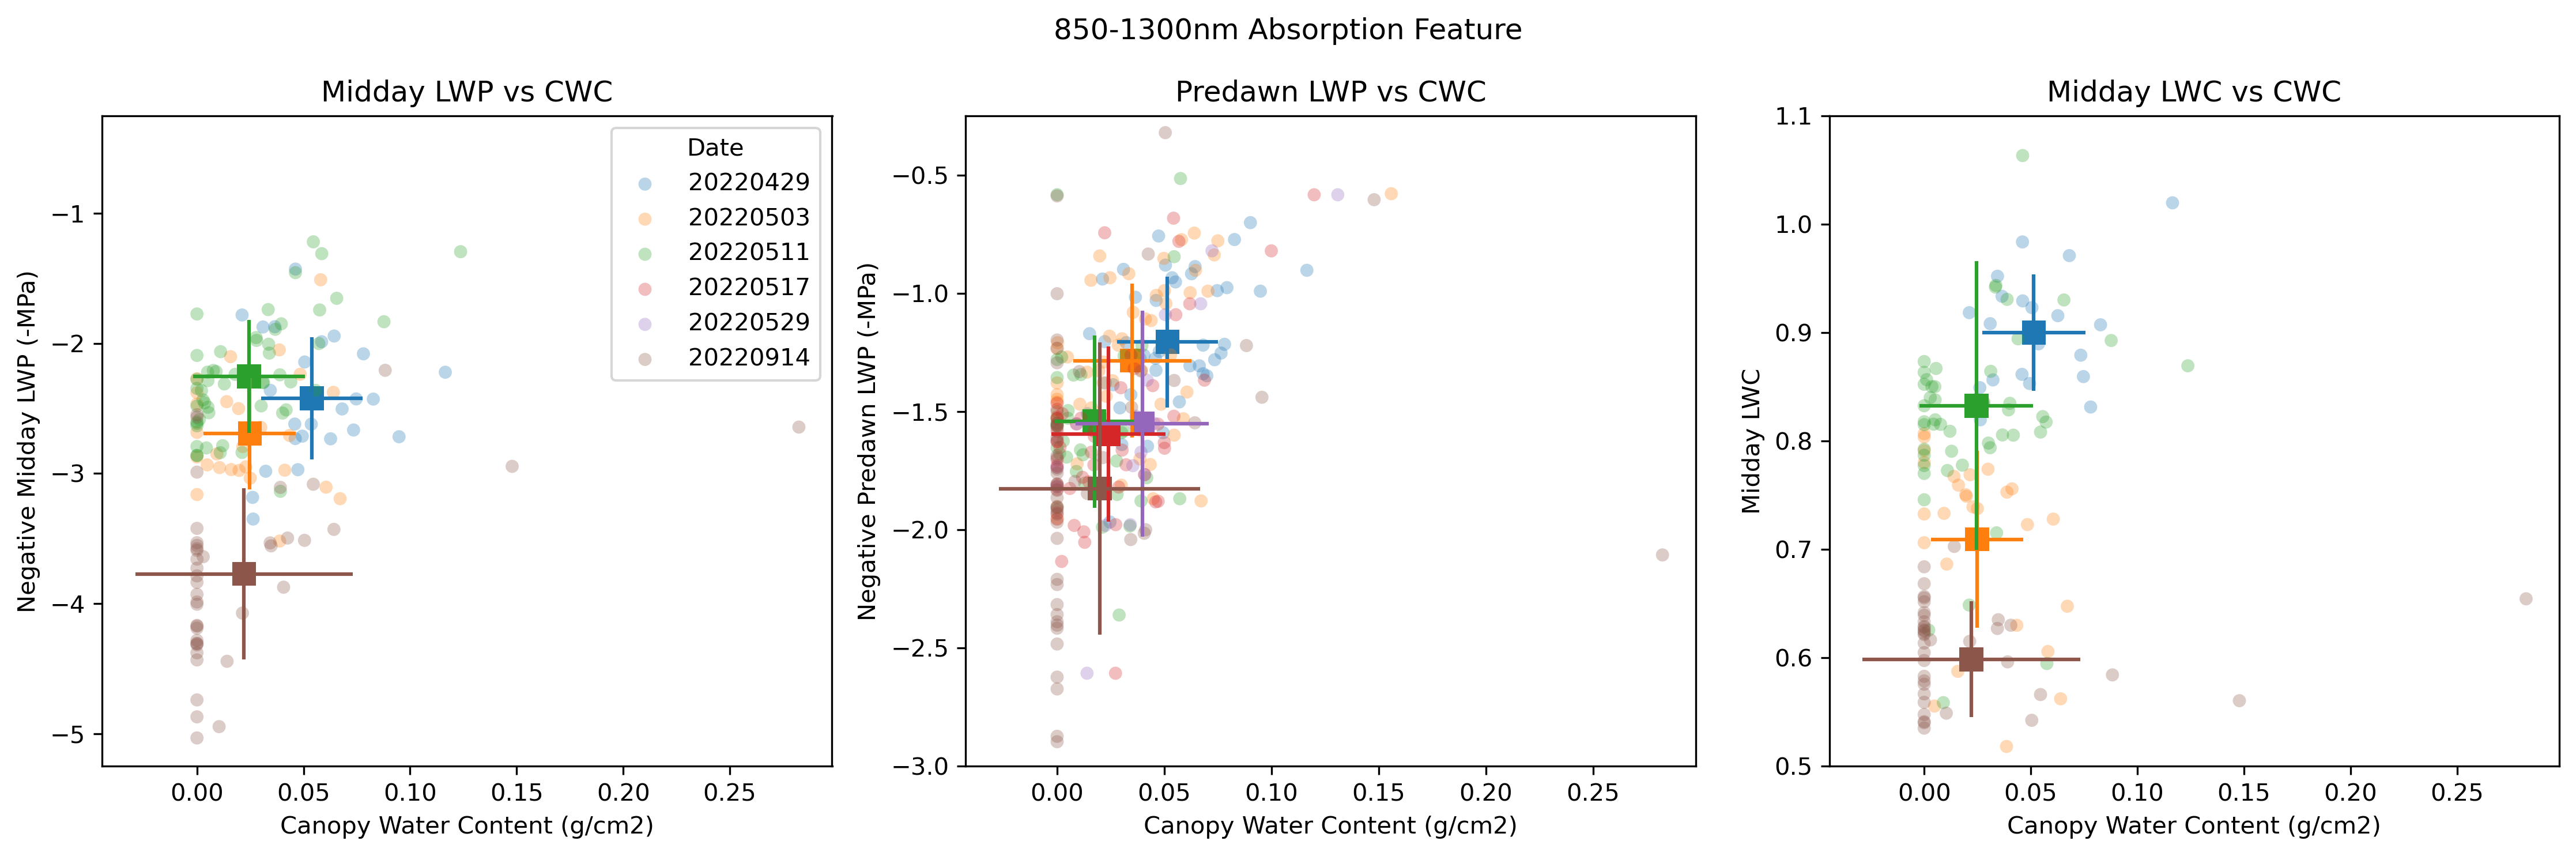

In [37]:
# combined absorption features (850-1300)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

for date, cwc_df, color in zip(date_list, cwc_df_list_850_1300, color_list):
    cwc_df_dropna_mdlwp = cwc_df.dropna(subset=['midday_lwp', 'CWC'])
    avg_cwc_mdlwp = cwc_df_dropna_mdlwp['CWC'].mean()
    avg_midday_lwp = cwc_df_dropna_mdlwp['midday_lwp'].mean()
    std_cwc_mdlwp = cwc_df_dropna_mdlwp['CWC'].std()
    std_midday_lwp = cwc_df_dropna_mdlwp['midday_lwp'].std()

    cwc_df_dropna_pdlwp = cwc_df.dropna(subset=['predawn_lwp', 'CWC'])
    avg_cwc_pdlwp = cwc_df_dropna_pdlwp['CWC'].mean()
    avg_predawn_lwp = cwc_df_dropna_pdlwp['predawn_lwp'].mean()
    std_cwc_pdlwp = cwc_df_dropna_pdlwp['CWC'].std()
    std_predawn_lwp = cwc_df_dropna_pdlwp['predawn_lwp'].std()

    cwc_df_dropna_lwc = cwc_df.dropna(subset=['midday_lwc', 'CWC'])
    avg_cwc_lwc = cwc_df_dropna_lwc['CWC'].mean()
    avg_midday_lwc = cwc_df_dropna_lwc['midday_lwc'].mean()
    std_cwc_lwc = cwc_df_dropna_lwc['CWC'].std()
    std_midday_lwc = cwc_df_dropna_lwc['midday_lwc'].std()

    ax1.scatter(cwc_df['CWC'], -1*cwc_df['midday_lwp'], c=color, edgecolors='none', s=30, alpha=0.3, label=date)
    ax1.scatter(avg_cwc_mdlwp, -1*avg_midday_lwp, c=color, edgecolors='none', s=100, alpha=1, marker='s')
    ax1.errorbar(avg_cwc_mdlwp, -1*avg_midday_lwp, yerr=std_midday_lwp, fmt='none', ecolor=color)
    ax1.errorbar(avg_cwc_mdlwp, -1*avg_midday_lwp, xerr=std_cwc_mdlwp, fmt='none', ecolor=color)

    ax2.scatter(cwc_df['CWC'], -1*cwc_df['predawn_lwp'], c=color, edgecolors='none', s=30, alpha=0.3, label=date)
    ax2.scatter(avg_cwc_pdlwp, -1*avg_predawn_lwp, c=color, edgecolors='none', s=100, alpha=1, marker='s')
    ax2.errorbar(avg_cwc_pdlwp, -1*avg_predawn_lwp, yerr=std_predawn_lwp, fmt='none', ecolor=color)
    ax2.errorbar(avg_cwc_pdlwp, -1*avg_predawn_lwp, xerr=std_cwc_pdlwp, fmt='none', ecolor=color)

    ax3.scatter(cwc_df['CWC'], cwc_df['midday_lwc'], c=color, edgecolors='none', s=30, alpha=0.3, label=date)
    ax3.scatter(avg_cwc_lwc, avg_midday_lwc, c=color, edgecolors='none', s=100, alpha=1, marker='s')
    ax3.errorbar(avg_cwc_lwc, avg_midday_lwc, yerr=std_midday_lwc, fmt='none', ecolor=color)
    ax3.errorbar(avg_cwc_lwc, avg_midday_lwc, xerr=std_cwc_lwc, fmt='none', ecolor=color)

fig.suptitle('850-1300nm Absorption Feature')

ax1.set_ylabel('Negative Midday LWP (-MPa)')
ax1.set_xlabel('Canopy Water Content (g/cm2)')
ax1.set_title('Midday LWP vs CWC')
# ax1.set_xlim(-0.01, 0.2)
ax1.set_ylim(-5.25, -0.25)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Date', loc='upper right')

ax2.set_ylabel('Negative Predawn LWP (-MPa)')
ax2.set_xlabel('Canopy Water Content (g/cm2)')
ax2.set_title('Predawn LWP vs CWC')
# ax2.set_xlim(-0.01, 0.2)
ax2.set_ylim(-3, -0.25)

ax3.set_ylabel('Midday LWC')
ax3.set_xlabel('Canopy Water Content (g/cm2)')
ax3.set_title('Midday LWC vs CWC')
# ax3.set_xlim(-0.01, 0.2)
ax3.set_ylim(0.5, 1.1)

plt.tight_layout()
plt.show()